# Visualization of inversion - Diorama data

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from mpl_toolkits.axes_grid.inset_locator import inset_axes
from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [3]:
mypath = 'tfa_inversion/'

In [4]:
results = []
with open(mypath+'inc-71_dec-23_r1000_int15_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int15_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int15_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int9_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))        
with open(mypath+'inc-71_dec-23_r1000_int9_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int9_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int12_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int12_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int12_z0250_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int12_z0450_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int14_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int15_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int15_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int12_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-76_dec-28_r1000_int9_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-71_dec-23_r1000_int9_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc-66_dec-18_r1000_int9_z0350_dz450/inversion.pickle') as w:
        results.append(pickle.load(w))

In [5]:
xp = results[0]['xp']/1000.
yp = results[0]['yp']/1000.
zp = results[0]['zp']/1000.

results_verts = []
for r in results:
    for i in range(len(r['prisms'])):
        r['prisms'][i].x /= 1000.
        r['prisms'][i].y /= 1000.
        r['prisms'][i].z1 /= 1000.
        r['prisms'][i].z2 /= 1000.
    results_verts.append(mfun.plot_prisms(r['prisms']))

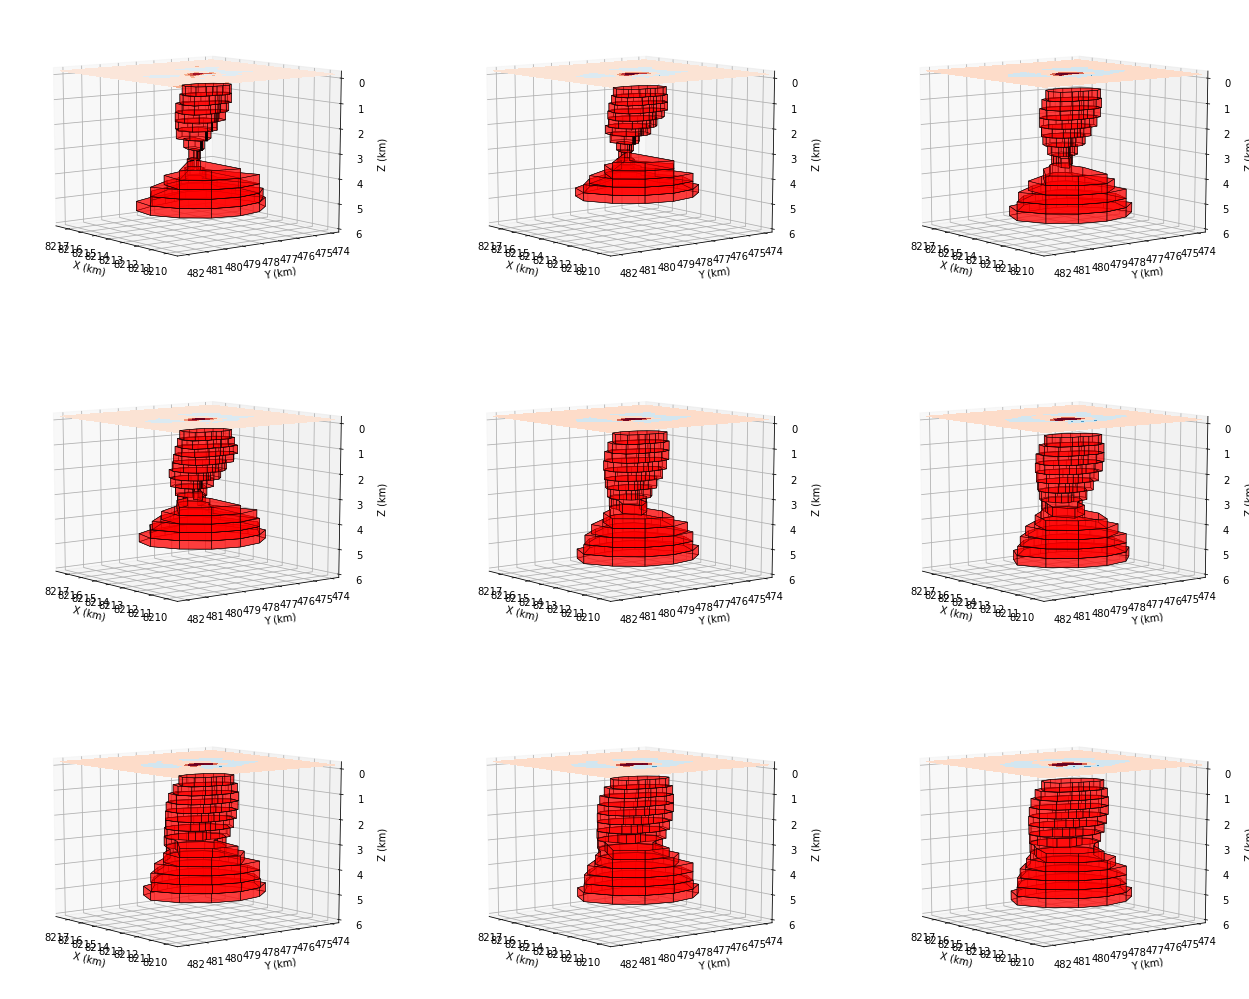

In [6]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(results_verts[i], alpha=0.5, 
     facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(np.min(xp), np.max(xp), 100)
    ax.set_ylim(np.min(yp), np.max(yp), 100)
    ax.set_zlim(6, -0.150, 100)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    ax.view_init(10, 142)
    ax.set_xticks(np.linspace(np.min(xp), np.max(xp), 5), minor=True)
    ax.set_yticks(np.linspace(np.min(yp), np.max(yp), 5), minor=True)
    ax.set_zticks(np.linspace(6, 0, 6), minor=True)

    ax.tricontourf(xp, yp, results[i]['residual'],
                    zdir='z', offset=-0.150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'diorama_3d_estimates_topxint.png', dpi=300)
plt.show()

/home/leonardo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


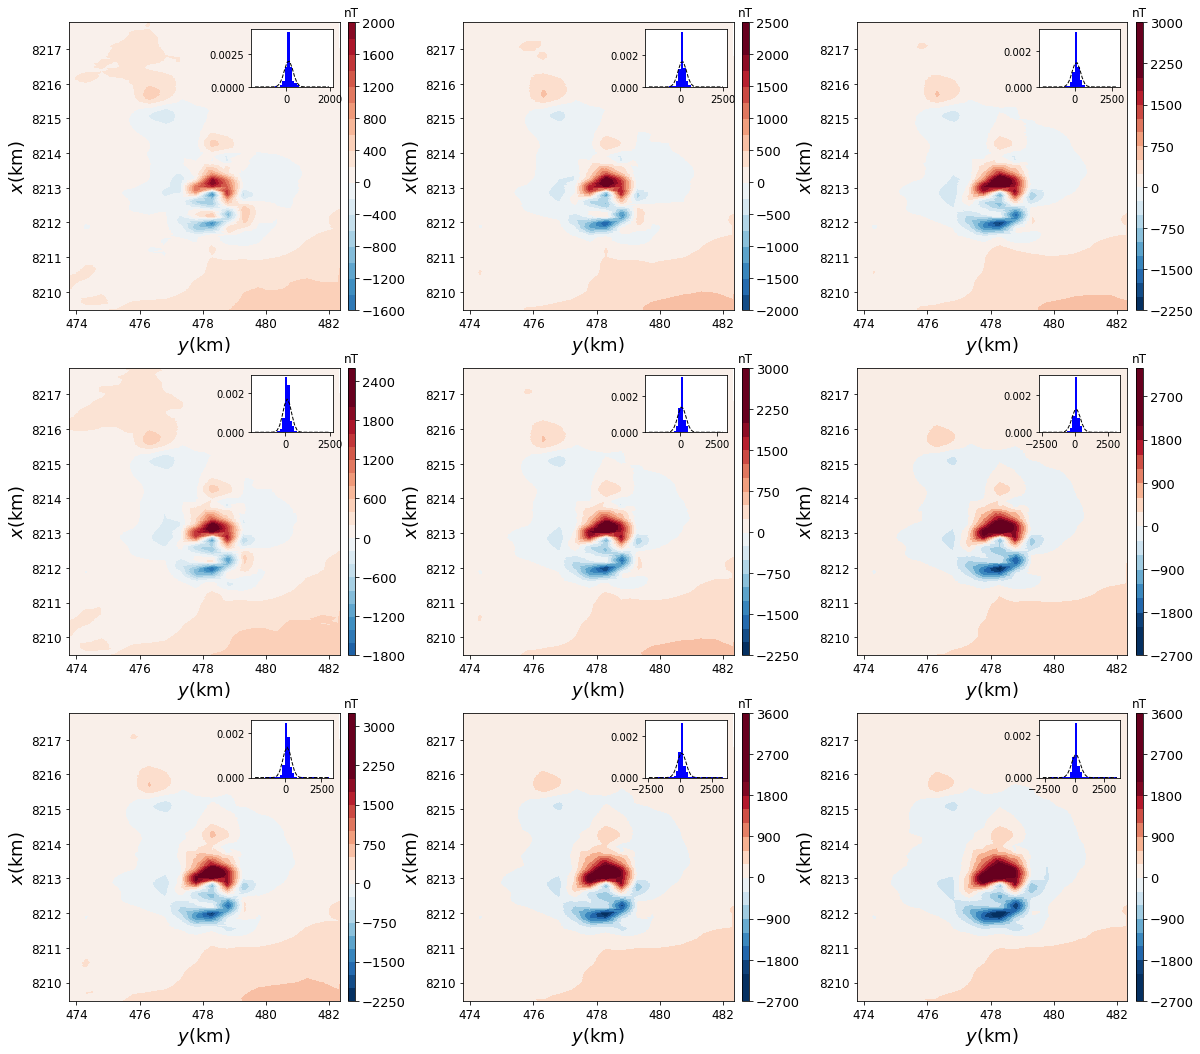

In [17]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
ax_list= []
for i in range(9):
    if i == 0:
        ax = plt.subplot(3, 3, i+1)
    else:
        ax = plt.subplot(3, 3, i+1, sharex = ax_list[0], sharey = ax_list[0])
    ax_list.append(ax)
    plt.tricontourf(yp, xp, results[i]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(km)', fontsize=18)
    plt.xlabel('$y$(km)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1, borderpad=0.7)
    mean = np.mean(results[i]['residual'])
    std = np.std(results[i]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i]['residual'],bins=nbins, normed=True, facecolor='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
plt.savefig(mypath+'diorama_3d_residual_topxint.png', dpi=300)
plt.show()

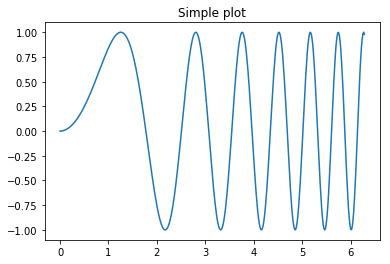

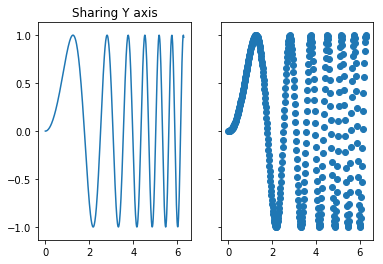

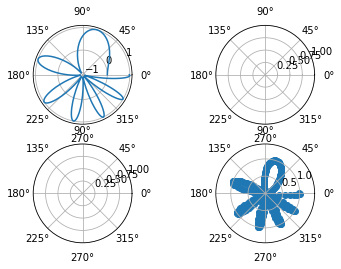

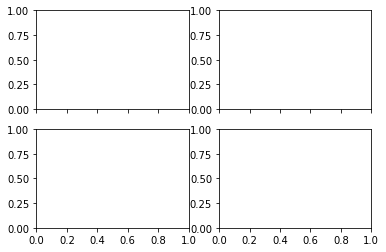

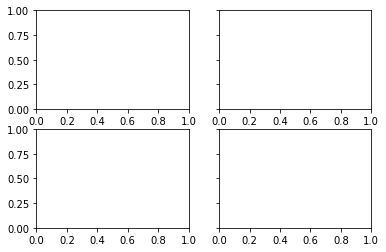

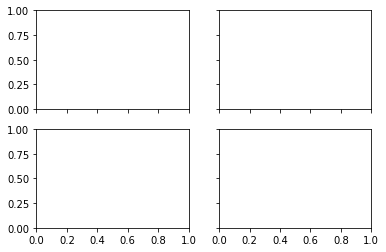

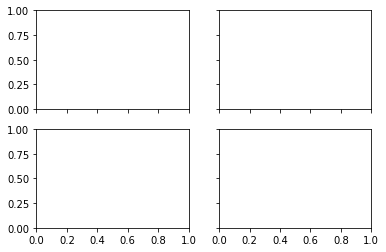

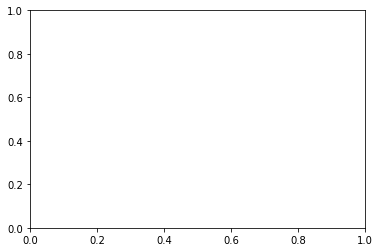

In [8]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Creates figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

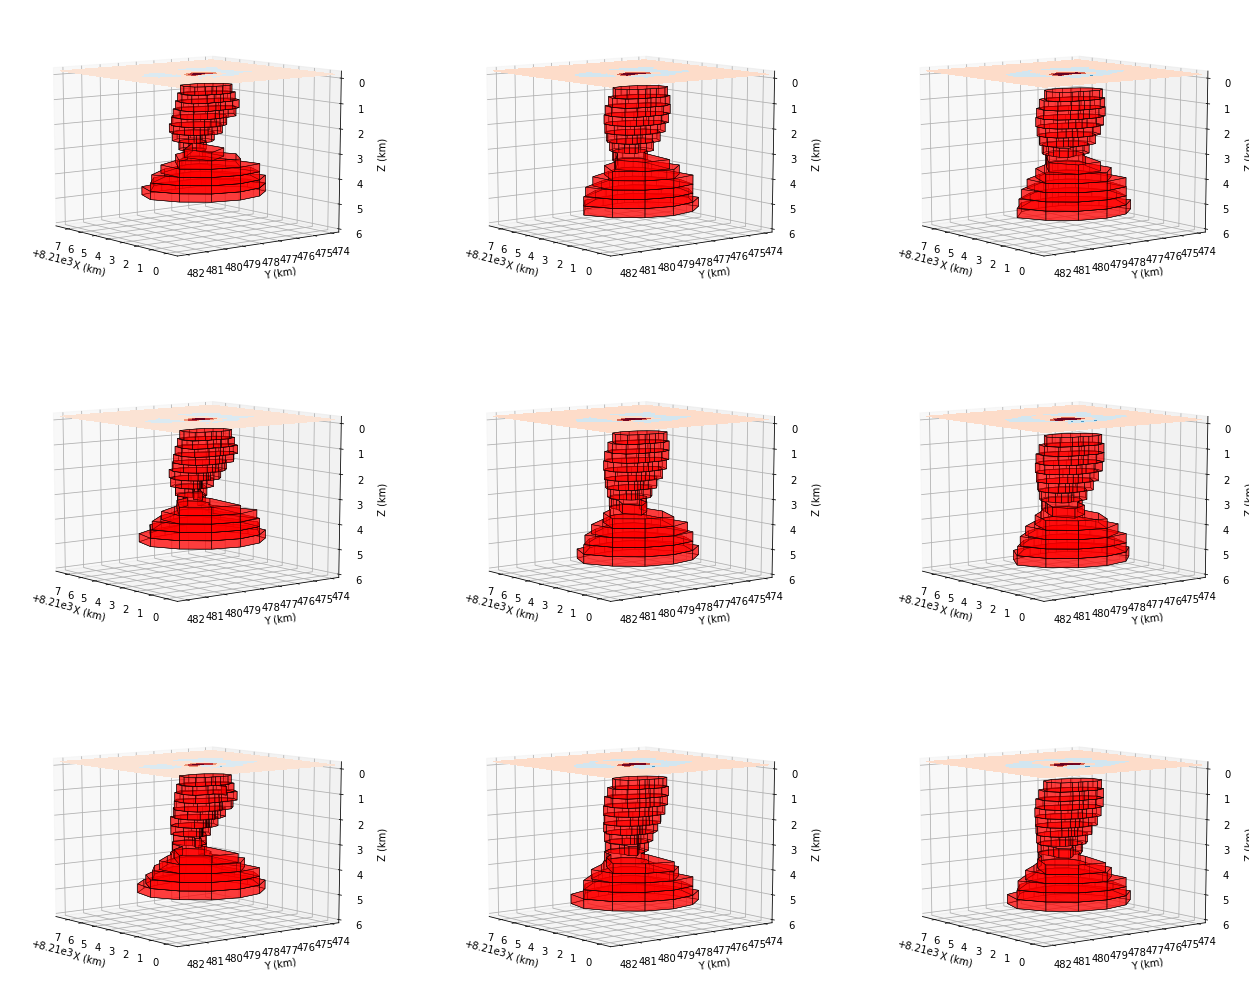

In [8]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(results_verts[i+9], alpha=0.5, 
     facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(np.min(xp), np.max(xp), 100)
    ax.set_ylim(np.min(yp), np.max(yp), 100)
    ax.set_zlim(6, -0.150, 100)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    ax.view_init(10, 142)
    ax.set_xticks(np.linspace(np.min(xp), np.max(xp), 5), minor=True)
    ax.set_yticks(np.linspace(np.min(yp), np.max(yp), 5), minor=True)
    ax.set_zticks(np.linspace(6, 0, 6), minor=True)

    ax.tricontourf(xp, yp, results[i+9]['residual'],
                    zdir='z', offset=-0.150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'diorama_3d_estimates_topxdir.png', dpi=300)
plt.show()

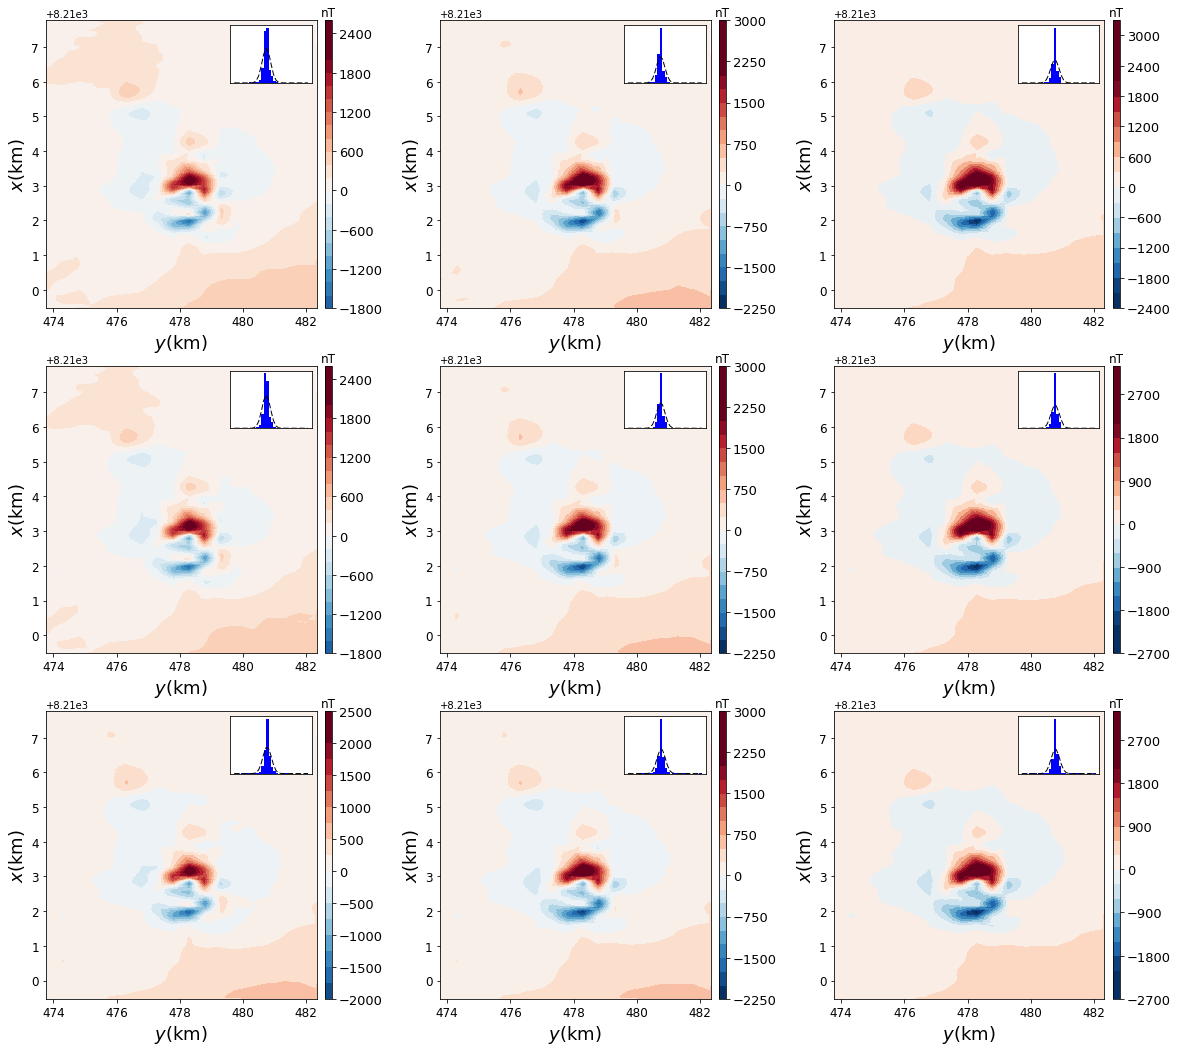

In [9]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+9]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(km)', fontsize=18)
    plt.xlabel('$y$(km)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+9]['residual'])
    std = np.std(results[i+9]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+9]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'diorama_3d_residual_topxdir.png', dpi=300)
plt.show()

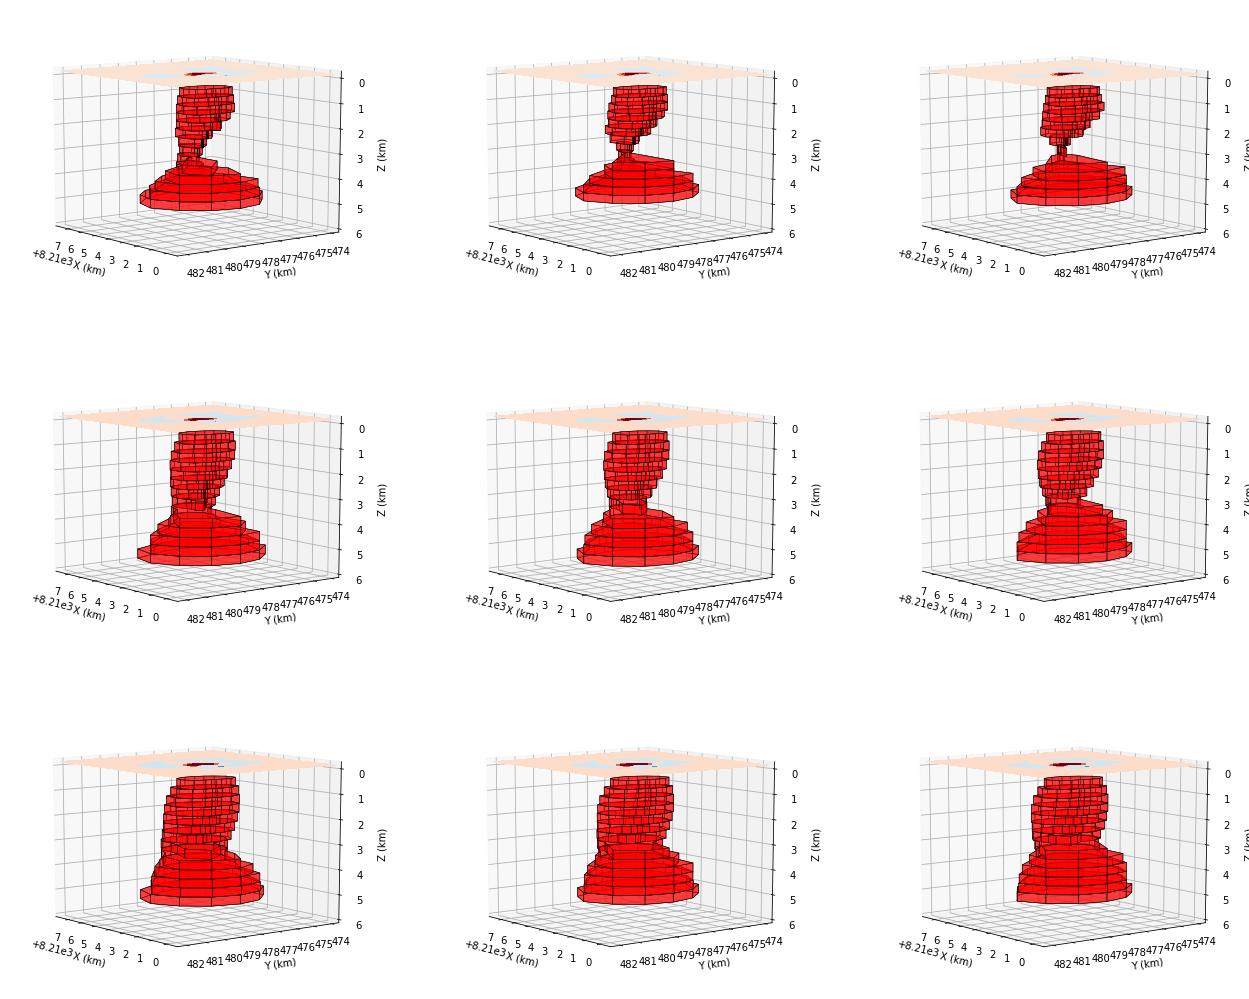

In [10]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(results_verts[i+18], alpha=0.5, 
     facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(np.min(xp), np.max(xp), 100)
    ax.set_ylim(np.min(yp), np.max(yp), 100)
    ax.set_zlim(6, -0.150, 100)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    ax.view_init(10, 142)
    ax.set_xticks(np.linspace(np.min(xp), np.max(xp), 5), minor=True)
    ax.set_yticks(np.linspace(np.min(yp), np.max(yp), 5), minor=True)
    ax.set_zticks(np.linspace(6, 0, 6), minor=True)

    ax.tricontourf(xp, yp, results[i+18]['residual'],
                    zdir='z', offset=-0.150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'diorama_3d_estimates_dirxint.png', dpi=300)
plt.show()

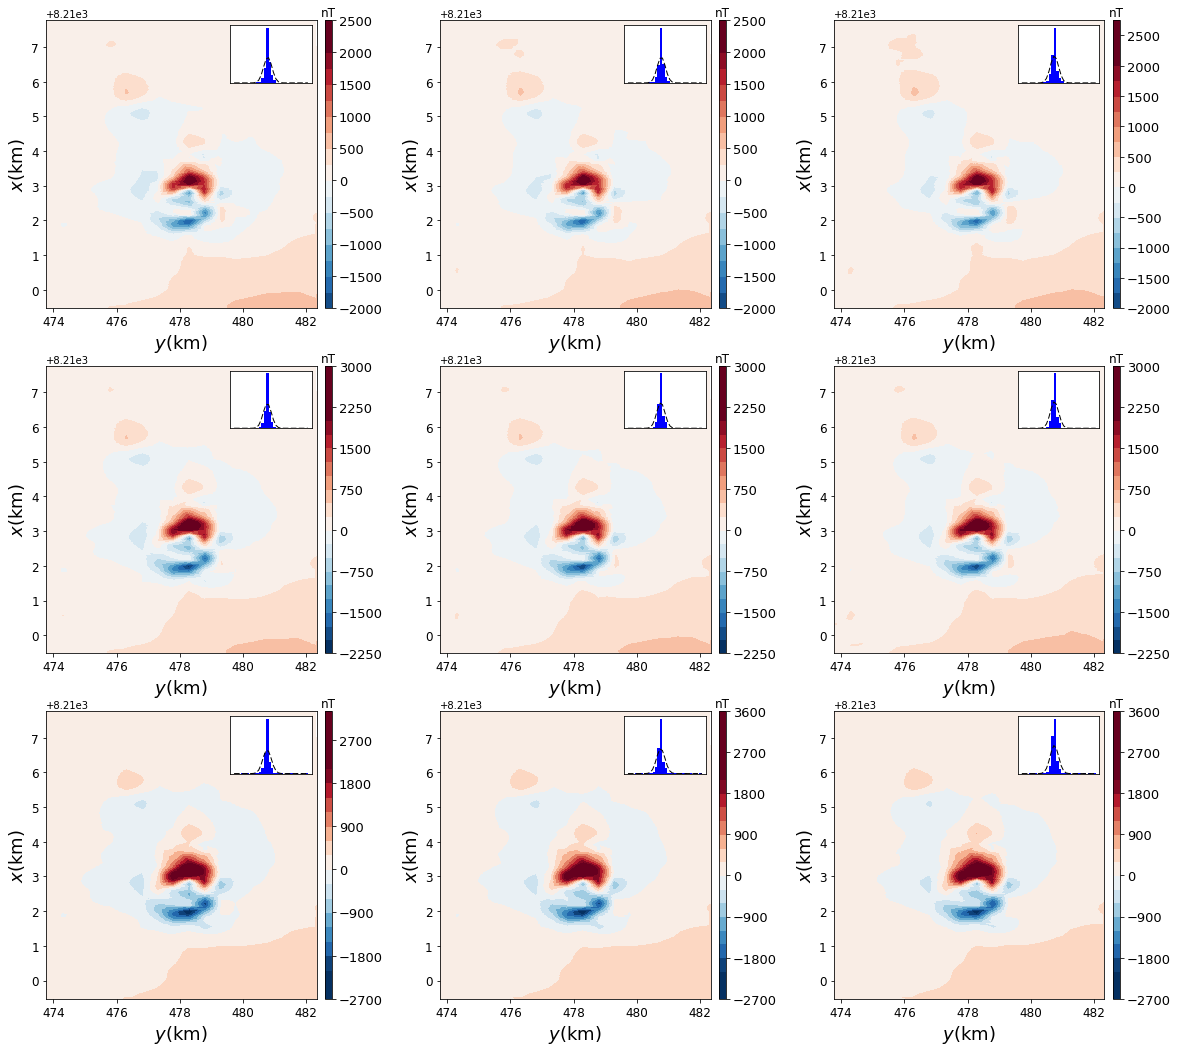

In [11]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+18]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(km)', fontsize=18)
    plt.xlabel('$y$(km)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+18]['residual'])
    std = np.std(results[i+18]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+18]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'diorama_3d_residual_dirxint.png', dpi=300)
plt.show()